In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import functions

from IPython.display import display, Math, Latex


In [24]:
X_train, y_train, X_valid, y_valid = functions.gen_linear_2Ddata(n_train=100, n_val=30)

#standardize
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_valid = (X_valid - np.mean(X_valid, axis=0)) / np.std(X_valid, axis=0)



In [25]:

display(Latex(r'''
Linear regression fits a hyperplane to training data so that the mean square error is minimized.
The loss function is:
\begin{align*}
        J(\theta) = \dfrac{1}{2m}\sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})^2
\end{align*}

where $h_{\theta}(x) = \theta^Tx.$ Since $J$ is convex, we can use gradient descent to update the parameters (we split $\theta$ into 
              $w, b$ ):
\begin{align*}
              w &:= w - \alpha \cdot \dfrac{1}{m} X^T\cdot(X_{pred} - y)\\
              b &:= b - \alpha \cdot \dfrac{1}{m} \sum_{i=1}^m(h_{\theta}(x^{(i)}) - y^{(i)})
\end{align*}
For the $L_2$ regularization case (Ridge), we add $\dfrac{\lambda}{2m} \| \theta \|^2 $ to the loss function, so
our update rule becomes:
\begin{align*}
            w &:= w - \alpha \cdot \bigg( \dfrac{1}{m} X^T \cdot (X_{pred} - y) + \dfrac{\lambda}{m}w \bigg) \\
            b &:= b - \alpha \cdot \dfrac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})
\end{align*}    
'''))



<IPython.core.display.Latex object>

In [26]:
class LinearRegression():
    def __init__(self, alpha = 0.01, l = 0):
        # hyperparameters
        self.alpha = alpha #learning rate
        self.l = l # l2 regularization

        # param
        self.w = None
        self.b = 0
    
    def h_theta(self, X): #X should either be (m x n) or (1 x n)
        return (X @ self.w + self.b)
    
    def fit(self, X, y, iterations = 10):
        m,n = X.shape
        self.w = np.zeros((n, 1))
        for i in range(0, iterations):
            self.w -= self.alpha * (1/m) * (X.T @ (self.h_theta(X) - y) + self.l * self.w) 
            self.b -= self.alpha * (1/m) * np.sum(self.h_theta(X) - y)




Theta:  [[-0.04584335]
 [ 0.28164358]
 [-0.18576443]]


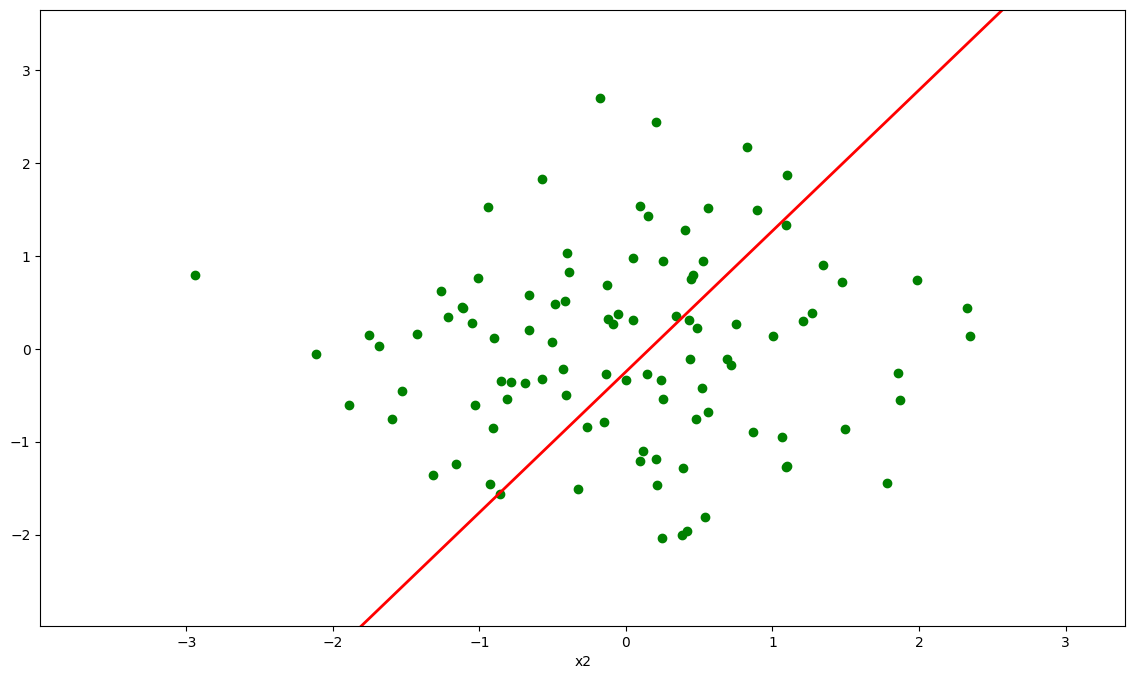

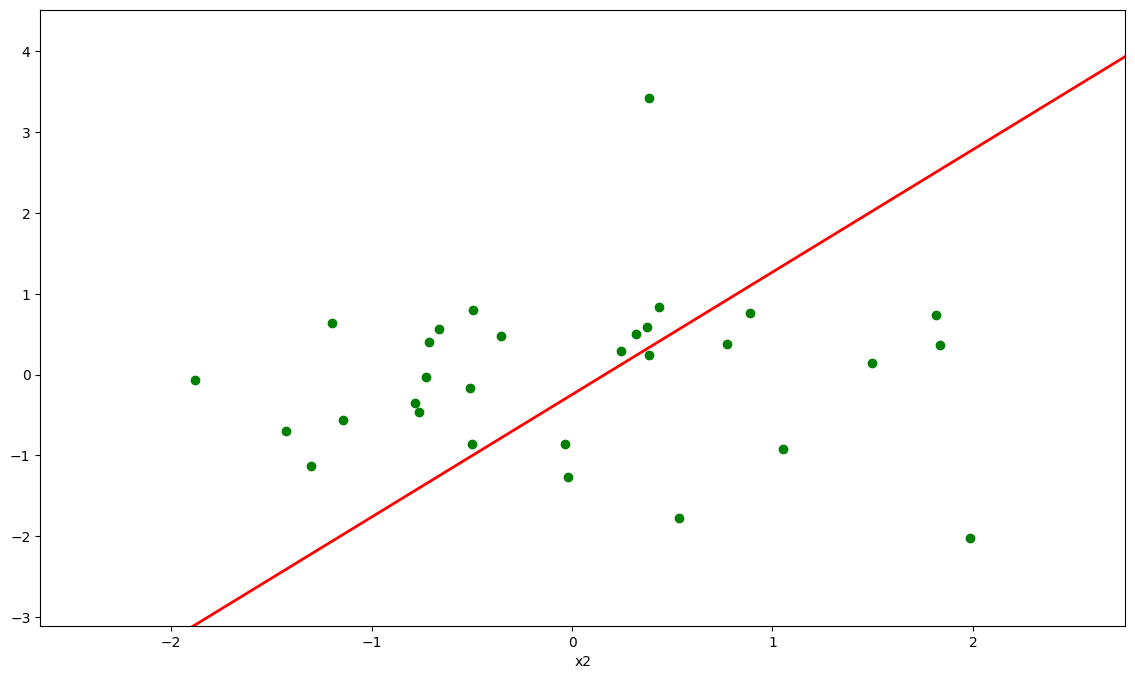

In [27]:
model = LinearRegression(alpha = 0.01, l = 0)

model.fit(X_train, y_train.reshape(-1, 1))

theta = np.vstack((np.array([[model.b]]), model.w))
print("Theta: ", theta)

functions.plot_2D_data(X_train, y_train, theta, log_reg=False)
functions.plot_2D_data(X_valid, y_valid, theta, log_reg=False)